In [252]:
#import Libararies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [253]:
le = LabelEncoder()

In [254]:
#import dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# **Data Exploring**

In [255]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Churn: Customers who left within the last month 
- Services that each customer has signed up for :
 phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information : tenure-> how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers : gender, age range, and if they have partners and dependents

In [256]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [257]:
df.shape

(7043, 21)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [259]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [260]:
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        print(f'{col} : {df[col].unique()}')


#print categorical unique values in coulumns

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [262]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# **Data CLeaning**

In [263]:
df.drop('customerID', axis=1,inplace=True)

In [264]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [265]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

top value repeated is ' '

In [266]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [267]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', np.nan), errors='coerce')

#errors='coerce' means that any values that cannot be converted (like ' ') will be replaced with NaN

In [268]:
len(df[df['TotalCharges']==' '])

0

In [269]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [270]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Mean: 2283.30
- The average value of TotalCharges is 2283.30. However, the mean can be skewed by outliers.

Median (50%): 1397.48
- This is a measure of central tendency that is less affected by outliers. Since the median is significantly lower than the mean, it suggests a right-skewed distribution.

The median is a better measure for filling null values because it is less influenced by extreme values.


In [271]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [272]:
df.TotalCharges.isnull().sum()

0

In [273]:
df.columns=df.columns.str.capitalize()

In [274]:
df.columns

Index(['Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Tenure',
       'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity',
       'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv',
       'Streamingmovies', 'Contract', 'Paperlessbilling', 'Paymentmethod',
       'Monthlycharges', 'Totalcharges', 'Churn'],
      dtype='object')

In [275]:
for column in df.columns:
    if set(df[column].unique())=={'Yes' , 'No'}:
        df[column]=df[column].replace({'Yes': 1, 'No': 0})

C:\Users\zeina\AppData\Local\Temp\ipykernel_5780\2437146339.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column]=df[column].replace({'Yes': 1, 'No': 0})


In [276]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender']

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: Gender, Length: 7043, dtype: int32

In [277]:
df.head()

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   int32  
 1   Seniorcitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   Tenure            7043 non-null   int64  
 5   Phoneservice      7043 non-null   int64  
 6   Multiplelines     7043 non-null   object 
 7   Internetservice   7043 non-null   object 
 8   Onlinesecurity    7043 non-null   object 
 9   Onlinebackup      7043 non-null   object 
 10  Deviceprotection  7043 non-null   object 
 11  Techsupport       7043 non-null   object 
 12  Streamingtv       7043 non-null   object 
 13  Streamingmovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  Paperlessbilling  7043 non-null   int64  
 16  Paymentmethod     7043 non-null   object 


In [279]:
categorical=df.select_dtypes(include=['object']).columns
numerical=df.select_dtypes(include=['number']).columns

In [280]:
categorical

Index(['Multiplelines', 'Internetservice', 'Onlinesecurity', 'Onlinebackup',
       'Deviceprotection', 'Techsupport', 'Streamingtv', 'Streamingmovies',
       'Contract', 'Paymentmethod'],
      dtype='object')

In [281]:
numerical

Index(['Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Tenure',
       'Phoneservice', 'Paperlessbilling', 'Monthlycharges', 'Totalcharges',
       'Churn'],
      dtype='object')

In [282]:
df.columns

Index(['Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Tenure',
       'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity',
       'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv',
       'Streamingmovies', 'Contract', 'Paperlessbilling', 'Paymentmethod',
       'Monthlycharges', 'Totalcharges', 'Churn'],
      dtype='object')

In [283]:
# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=categorical, drop_first=True)


In [284]:
df.columns

Index(['Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Tenure',
       'Phoneservice', 'Paperlessbilling', 'Monthlycharges', 'Totalcharges',
       'Churn', 'Multiplelines_No phone service', 'Multiplelines_Yes',
       'Internetservice_Fiber optic', 'Internetservice_No',
       'Onlinesecurity_No internet service', 'Onlinesecurity_Yes',
       'Onlinebackup_No internet service', 'Onlinebackup_Yes',
       'Deviceprotection_No internet service', 'Deviceprotection_Yes',
       'Techsupport_No internet service', 'Techsupport_Yes',
       'Streamingtv_No internet service', 'Streamingtv_Yes',
       'Streamingmovies_No internet service', 'Streamingmovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'Paymentmethod_Credit card (automatic)',
       'Paymentmethod_Electronic check', 'Paymentmethod_Mailed check'],
      dtype='object')

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 7043 non-null   int32  
 1   Seniorcitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   Tenure                                 7043 non-null   int64  
 5   Phoneservice                           7043 non-null   int64  
 6   Paperlessbilling                       7043 non-null   int64  
 7   Monthlycharges                         7043 non-null   float64
 8   Totalcharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Multiplelines_No phone service         7043 non-null   bool   
 11  Mult

# **Data Visualization**

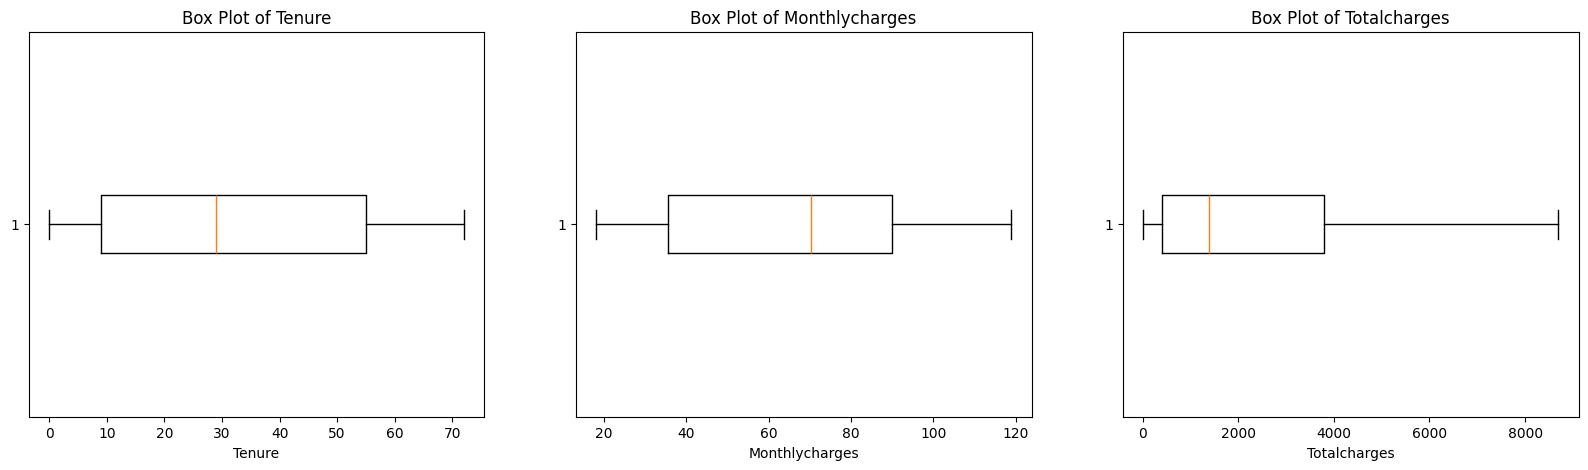

In [286]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
columns_to_check = ['Tenure', 'Monthlycharges', 'Totalcharges']
for ax, column in zip(axes, columns_to_check):
    ax.boxplot(df[column].astype(float), vert=False)  # Set vert=False for horizontal
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel(column)  

plt.show()

In [287]:
outliers_dict = {}

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75) 
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_dict[column] = outliers

    # Print outliers for each column
    print(f'Outliers in {column}:\n', outliers)

Outliers in Tenure:
 Empty DataFrame
Columns: [Gender, Seniorcitizen, Partner, Dependents, Tenure, Phoneservice, Paperlessbilling, Monthlycharges, Totalcharges, Churn, Multiplelines_No phone service, Multiplelines_Yes, Internetservice_Fiber optic, Internetservice_No, Onlinesecurity_No internet service, Onlinesecurity_Yes, Onlinebackup_No internet service, Onlinebackup_Yes, Deviceprotection_No internet service, Deviceprotection_Yes, Techsupport_No internet service, Techsupport_Yes, Streamingtv_No internet service, Streamingtv_Yes, Streamingmovies_No internet service, Streamingmovies_Yes, Contract_One year, Contract_Two year, Paymentmethod_Credit card (automatic), Paymentmethod_Electronic check, Paymentmethod_Mailed check]
Index: []

[0 rows x 31 columns]
Outliers in Monthlycharges:
 Empty DataFrame
Columns: [Gender, Seniorcitizen, Partner, Dependents, Tenure, Phoneservice, Paperlessbilling, Monthlycharges, Totalcharges, Churn, Multiplelines_No phone service, Multiplelines_Yes, Internets

This means that there is no outliers

In [288]:
# Calculate correlation with Churn
correlation_matrix = df.corr()

# Get correlations with Churn
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

print(churn_correlation)


Churn                                    1.000000
Internetservice_Fiber optic              0.308020
Paymentmethod_Electronic check           0.301919
Monthlycharges                           0.193356
Paperlessbilling                         0.191825
Seniorcitizen                            0.150889
Streamingtv_Yes                          0.063228
Streamingmovies_Yes                      0.061382
Multiplelines_Yes                        0.040102
Phoneservice                             0.011942
Gender                                  -0.008612
Multiplelines_No phone service          -0.011942
Deviceprotection_Yes                    -0.066160
Onlinebackup_Yes                        -0.082255
Paymentmethod_Mailed check              -0.091683
Paymentmethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
Techsupport_Yes                         -0.164674
Onlinesecurity_Yes                      -0.171226


In [289]:
df.drop('Gender',axis=1, inplace=True)
df.drop('Phoneservice',axis=1, inplace=True)

# **Evaluating Model**

In [290]:
X = df.drop('Churn', axis=1)  # Assuming 'Churn' has been encoded to 'Churn_Yes'
y = df['Churn']

In [291]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:

lr = LogisticRegression()
lr.fit(X_train, y_train)


c:\Users\zeina\anaconda3\envs\MY_project\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [293]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [294]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy: " , train_accuracy)
print("Testing Accuracy:" , test_accuracy)

Training Accuracy:  0.8017394391196309
Testing Accuracy: 0.8190205819730305


# **Linking Deployment**

In [298]:
# import joblib
# joblib_file="my_joblib_model"
# # Save the model to a file & run it in notebook
# joblib.dump(lr,joblib_file)
# # Load the model from the file & run it in deployment file
# loaded_model=joblib.load(open(joblib_file,'rb'))

In [303]:
import pickle
# Save model object to a file & run it in notebook
pickle.dump(lr, open('pickeld_model', 'wb'))
# Load the model from the file & run it in deployment file
loaded_model = pickle.load(open('pickeld_model', 'rb'))